# Profile likelihood

## Introduction
In this example, we compute the profile likelihood for parameters of the [2-compartment target-mediated drug disposition (TMDD) model](https://mlxtran.lixoft.com/libraries/full-tmdd-model/).  We do the following:
* Compute and plot the profile likelihood following optimization
* Summarize profile results as confidence intervals and compare to asymptotic intervals from the Fisher information
* Evaluate parameter identifiability using the profile likelihood

In [2]:
import abm

import warnings

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import tabeline as tl
import plotnine as p9
import pandas as pd

# High Contrast Colors
# Used in basic plots of simulation + data
YELLOW, BLACK = '#ddaa33', '#000000'

## Fitting to data

Suppose we have data for free ligand (`L`) amounts, measured at various times up to 7 days, and wish to fit parameters `kon`, `ksyn`, and `kint`.  First, simulate with the uncalibrated parameters.

Total: 1, Running: 0, Succeeded: 1, Failed: 0

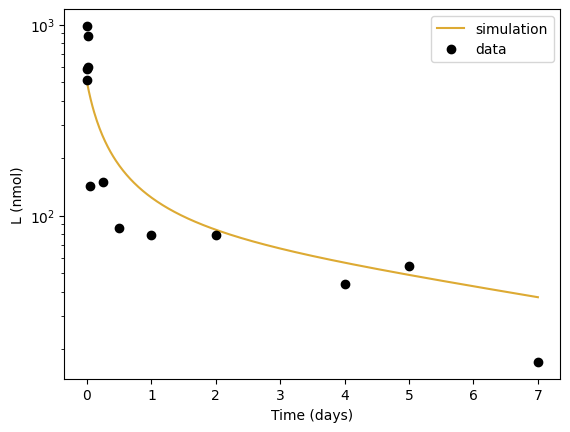

In [3]:
data_7d_tl = tl.DataFrame.read_csv("tables/TMDD_data_7d.csv")
sim_7d_initial_tl = abm.simulate(
    models="model_files/TMDD.model",
    parameters="tables/TMDD_parameters_1.csv",
    times=abm.linspace(0, 7, 501, "d"),
    outputs=["L"],
).to_tabeline()

plt.semilogy(sim_7d_initial_tl[:, "t"], sim_7d_initial_tl[:, "L"], color=YELLOW, label="simulation")
plt.semilogy(data_7d_tl[:, "time"], data_7d_tl[:, "measurement"], "o", color=BLACK, label="data")
plt.xlabel("Time (days)")
plt.ylabel("L (nmol)")
plt.legend()
plt.show()

Next, run an optimization and simulate the result.

In [4]:
opt_result_7d = abm.optimize(
    measurements="tables/TMDD_data_7d.csv",
    models="model_files/TMDD.model",
    parameters="tables/TMDD_parameters_1.csv",
    opttol=1e-5,
)

Total: 1, Running: 0, Succeeded: 1, Failed: 0

iteration,objective,kon_fit_0,ksyn_fit_2,kint_fit_5
0,0.578779,0.010000,1.000000,0.010000
1,-5.461883,0.027071,1.094759,0.010001
2,-8.108596,0.039033,2.776460,0.010012
3,-8.108596,0.039033,2.776460,0.010012
4,-9.852983,0.041337,4.562522,0.010015
5,-9.852983,0.041337,4.562522,0.010015
6,-10.500073,0.042435,5.850327,0.010016
7,-10.500073,0.042435,5.850327,0.010016
8,-10.546509,0.042812,6.112169,0.010017
9,-10.558522,0.043746,6.358608,0.010022


Total: 1, Running: 0, Succeeded: 1, Failed: 0

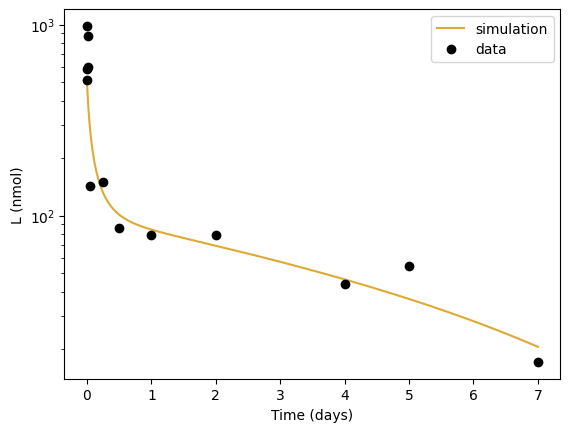

In [5]:
sim_7d_fit_tl = opt_result_7d.simulate(
    times=abm.linspace(0, 7, 501, "d"),
    outputs=["L"],
).to_tabeline()

plt.semilogy(sim_7d_fit_tl[:, "t"], sim_7d_fit_tl[:, "L"], color=YELLOW, label="simulation")
plt.semilogy(data_7d_tl[:, "time"], data_7d_tl[:, "measurement"], "o", color=BLACK, label="data")
plt.xlabel("Time (days)")
plt.ylabel("L (nmol)")
plt.legend()
plt.show()

## Calculating the profile likelihood
The fit looks pretty good, but we wish to evaluate uncertainty on the fitted parameters.  We use the `profile_likelihood` method on `OptimizationResult`.

Starting from the optimized parameter values, this spawns a number of new optimizations, fixing each parameter one at a time and optimizing with respect to the rest.  The algorithm continues until a threshold is crossed (corresponding to a confidence interval bound on the parameter), or until another stopping criterion is satisfied (e.g. a parameter bound is crossed).  Internally, the algorithm used is based on the methods of [Raue et. al.](https://academic.oup.com/bioinformatics/article/25/15/1923/213246).

By default, simultaneous 95% confidence intervals are calculated.  This is configurable via the `fraction` and `simultaneous_intervals` keyword arguments.  See the documentation (or use `help(opt_result.profile_likelihood)`) to see a description of these and other options, including those that control the algorithm.

In [6]:
profiles_7d = opt_result_7d.profile_likelihood()

In [7]:
help(opt_result_7d.profile_likelihood)

Help on method profile_likelihood in module abm._optimize:

profile_likelihood(*, fraction: 'float' = 0.95, simultaneous_intervals: 'bool' = True, precision: 'float' = 0.1, max_iterations: 'int | None' = None, min_step: 'float' = 1e-06, max_step: 'float' = 0.18, reversal_reltol: 'float | None' = None, reversal_abstol: 'float | None' = None, threshold_method: "Literal['step_over', 'linear_interpolation']" = 'linear_interpolation', optimization_max_iterations: 'int | None' = None) -> 'DataPipeResult' method of abm._optimize.OptimizationResult instance
    Computes the profile likelihood for each fitted parameter using the
    objective G = -2 * log(likelihood) + constant and its gradient.

    Parameters
    ----------
    fraction: `float`, default=0.95
        Desired significance level, e.g. use 0.95 for 95% confidence.  Target
        objective threshold is the corresponding critical value of the
        chi-squared distribution.
    simultaneous_intervals: `bool`, default=`True`
   

The method returns a result that may be fed into other data pipes.  Let's look at the raw results.

In [8]:
display(profiles_7d.to_data_frame())

,parameter_name,parameter_value,parameter_unit,objective_value,direction,termination,parameter_threshold,objective_threshold
0,kon_fit_0,0.043727,1/nM/d,-10.559105,lower,threshold,0.0102,-2.744377
1,kon_fit_0,0.036524,1/nM/d,-10.442765,lower,threshold,0.0102,-2.744377
2,kon_fit_0,0.030507,1/nM/d,-10.092324,lower,threshold,0.0102,-2.744377
3,kon_fit_0,0.025482,1/nM/d,-9.503951,lower,threshold,0.0102,-2.744377
4,kon_fit_0,0.021284,1/nM/d,-8.673369,lower,threshold,0.0102,-2.744377
...,...,...,...,...,...,...,...,...
240,kint_fit_5,0.012008,1/d,-10.559196,upper,reversal,NaN,NaN
241,kint_fit_5,0.014377,1/d,-10.559305,upper,reversal,NaN,NaN
242,kint_fit_5,0.017212,1/d,-10.559432,upper,reversal,NaN,NaN
243,kint_fit_5,0.020607,1/d,-10.559579,upper,reversal,NaN,NaN


The raw profiles are in the `parameter_value` and `objective_value` columns.  For each parameter and profile direction, the `termination` column describes how each profile ended.  If `termination == "threshold"`, then `parameter_threshold` indicates the approximate confidence interval bound.  Other termination values indicate the algorithm did not reach the threshold.  This may be a symptom of parameter non-identifiability.

It is often a good idea to plot the profile likelihood for each parameter when diagnosing failures to reach a confidence bound.  We use the following helper function throughout this tutorial.

In [9]:
def plot_and_summarize_profiles(profiles, title: str):
    """Plots the profile likelihood and prints summary table of confidence intervals"""

    # Extract confidence interval information from the table
    profiles_df: pd.DataFrame = profiles.to_pandas()
    profiles_summary_df = profiles_df[['parameter_name','direction','termination','parameter_threshold','objective_threshold']].drop_duplicates()

    profiles_df.parameter_name = pd.Categorical(profiles_df.parameter_name, 
                      categories=profiles_df.parameter_name.unique(),
                      ordered=True)

    # Use the scipy.stats to calculate the objective function threshold to calculate the 95% confidence threshold.
    # Currently the threshold for the desired confidence interval is returned by the profile likelihood method only if that threshold is reached
    # As it is not guaranteed that you cross this threshold, it is recommended to that you calculate this threshold with scipy to avoid errors
    objective_threshold = profiles_df.objective_value.min() + scipy.stats.chi2.ppf(0.95,len(profiles_df.parameter_name.unique()))

    fig = (p9.ggplot()
               + p9.geom_line(data = profiles_df, mapping = p9.aes(x = 'np.log10(parameter_value)',y = 'objective_value'), color = YELLOW, size = 1.1)
               + p9.geom_hline(yintercept = objective_threshold, linetype = 'dashed', size = 1.1)
               + p9.facet_wrap('parameter_name', scales = 'free_x', labeller = lambda x: f'log10({x.split('_fit_')[0]})',
                               nrow = 1)
               + p9.theme(aspect_ratio = 1, axis_text_x=p9.element_text(rotation=45, hjust=1))
               + p9.labs(x = 'Parameter Value', y = '-2log(likelihood)')
               + p9.ggtitle(title)
              )
    
    display(profiles_summary_df)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", UserWarning)  # Silence warnings about replacing the x scale
        display(fig)

,parameter_name,direction,termination,parameter_threshold,objective_threshold
0,kon_fit_0,lower,threshold,0.010200,-2.744377
12,kon_fit_0,upper,threshold,0.173109,-2.744377
24,ksyn_fit_2,lower,max_iterations,NaN,NaN
124,ksyn_fit_2,upper,threshold,11.564039,-2.744377
139,kint_fit_5,lower,max_iterations,NaN,NaN
239,kint_fit_5,upper,reversal,NaN,NaN


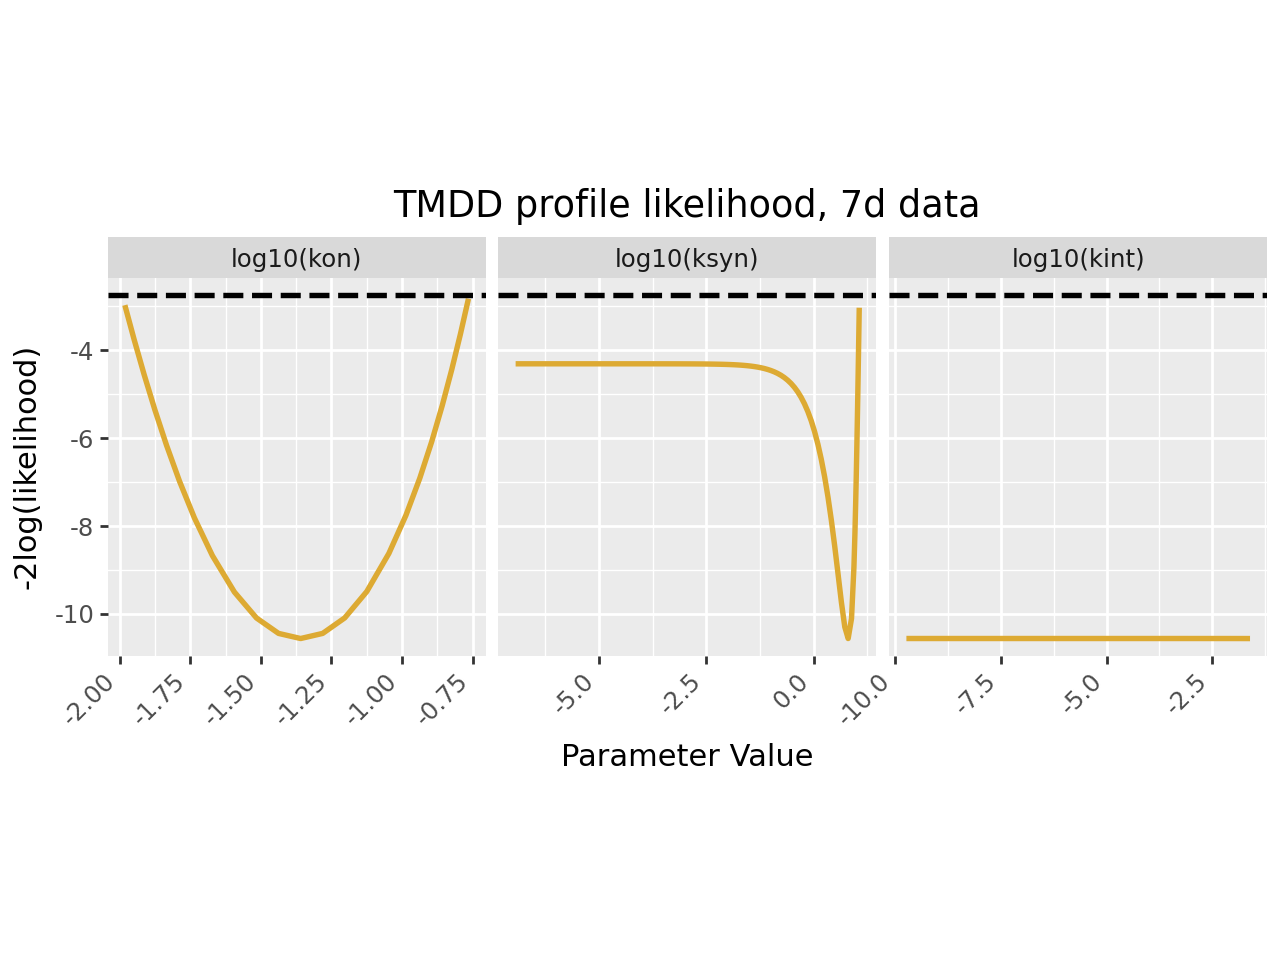

In [10]:
plot_and_summarize_profiles(profiles_7d, "TMDD profile likelihood, 7d data")

Parameter `kon` is clearly identifiable; and the 95% confidence interval is around [0.01, 0.17].  Our data included a good number of measurements in the first couple of hours after the dose, so this makes sense.

Note we have an upper bound on `ksyn`, but no lower bound, and we see the profile likelihood flattens to the left.  Our data is within phases 1, 2 (and a bit of 3) of the TMDD timecourse.  Parameter `ksyn` mainly controls the onset of phase 3.  For small `ksyn`, phase 3 occurs well beyond seven days, so there is no effect on the profile likelihood.  However, for larger `ksyn`, phase 3 occurs well within the seven days.

The effect of parameter `kint` occurs entirely beyond the seven days, and its profile likelihood is almost entirely flat.

From these data, `ksyn` and `kint` are not identifiable.

## Asymptotic comparison
Compare the profile likelihood confidence intervals to the [asymptotic ones calculated using a normal approximation at the minimum](https://en.wikipedia.org/wiki/Fisher_information).  Note we apply the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction) for the asymptotic intervals for a ballpark comparison (alternatively, we could set `simultaneous_intervals=False` for the profile likelihood).

In [11]:
num_parameters = 3
alpha = 0.05
asymptotic_ci = opt_result_7d.confidence_intervals(fraction=(1 - alpha / num_parameters), uncertainty_ceiling=1e8)
display(asymptotic_ci)

,parameter,value,unit,scale,lower,upper
0,kon_fit_0,0.043727,1/nM/d,log,0.010528,0.181611
1,ksyn_fit_2,6.312073,nmol/d,log,0.281127,141.723422
2,kint_fit_5,0.010030,1/d,log,0.000000,inf


The asymptotic interval for `kon` agrees closely with the profile likelihood (note its profile likelihood looks essentially quadratic).  For `ksyn`, though, the approximation is not as good, and cannot capture flat likelihood to the left.

## Fitting to better data
Suppose now we have have obtained `L` measurements beyond seven days.  Let's simulate our current best fit to the range of the new data.

Total: 1, Running: 0, Succeeded: 1, Failed: 0

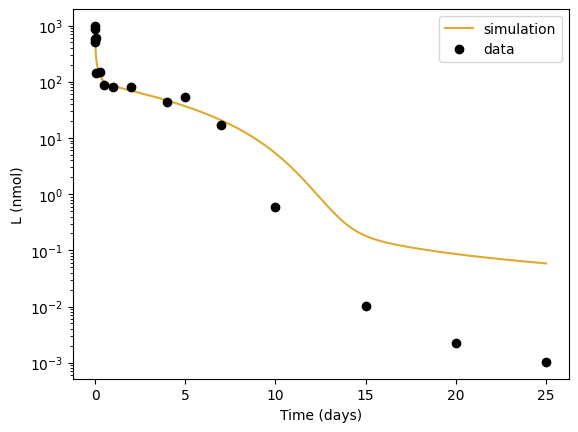

In [12]:
data_25d_tl = tl.DataFrame.read_csv("tables/TMDD_data_25d.csv")
sim_25d_tl = opt_result_7d.simulate(
    times=abm.linspace(0, 25, 501, "d"),
    outputs=["L"],
).to_tabeline()

plt.semilogy(sim_25d_tl[:, "t"], sim_25d_tl[:, "L"], color=YELLOW, label="simulation")
plt.semilogy(data_25d_tl[:, "time"], data_25d_tl[:, "measurement"], "o", color=BLACK, label="data")
plt.xlabel("Time (days)")
plt.ylabel("L (nmol)")
plt.legend()
plt.show()

Qualitatively, we can now see phase 3 and 4 in both the time course and the data.  We run an new optimization to fit to the new data, simulate the result, and calculate the profile likelihood.

In [13]:
opt_result_25d_1 = abm.optimize(
    measurements="tables/TMDD_data_25d.csv",
    models="model_files/TMDD.model",
    parameters="tables/TMDD_parameters_1.csv",
    opttol=1e-5,
)

Total: 1, Running: 0, Succeeded: 1, Failed: 0

iteration,objective,kon_fit_0,ksyn_fit_2,kint_fit_5
0,1163.547072,0.010000,1.000000,0.010000
1,679.557757,0.006092,3.729939,0.010166
2,378.321854,0.009131,59.499744,0.010606
3,151.396486,0.006244,42.999620,0.010704
4,88.461539,0.002465,54.065959,0.014300
5,61.270736,0.004240,36.130891,0.029888
6,25.204097,0.004752,33.810856,0.080537
7,25.204097,0.004752,33.810856,0.080537
8,10.366208,0.004919,30.591566,0.131287
9,10.366208,0.004919,30.591566,0.131287


Total: 1, Running: 0, Succeeded: 1, Failed: 0

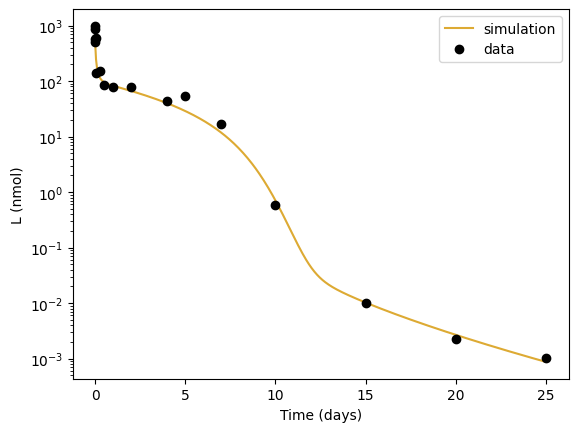

In [14]:
sim_25d_fit1_tl = opt_result_25d_1.simulate(
    times=abm.linspace(0, 25, 501, "d"),
    outputs=["L"],
).to_tabeline()

plt.semilogy(sim_25d_fit1_tl[:, "t"], sim_25d_fit1_tl[:, "L"], color=YELLOW, label="simulation")
plt.semilogy(data_25d_tl[:, "time"], data_25d_tl[:, "measurement"], "o", color=BLACK, label="data")
plt.xlabel("Time (days)")
plt.ylabel("L (nmol)")
plt.legend()
plt.show()

,parameter_name,direction,termination,parameter_threshold,objective_threshold
0,kon_fit_0,lower,threshold,0.015377,-6.753402
54,kon_fit_0,upper,threshold,0.197108,-6.753402
96,ksyn_fit_2,lower,threshold,6.926953,-6.753389
104,ksyn_fit_2,upper,threshold,12.700866,-6.753389
186,kint_fit_5,lower,threshold,0.135921,-6.753414
194,kint_fit_5,upper,threshold,0.217534,-6.753414


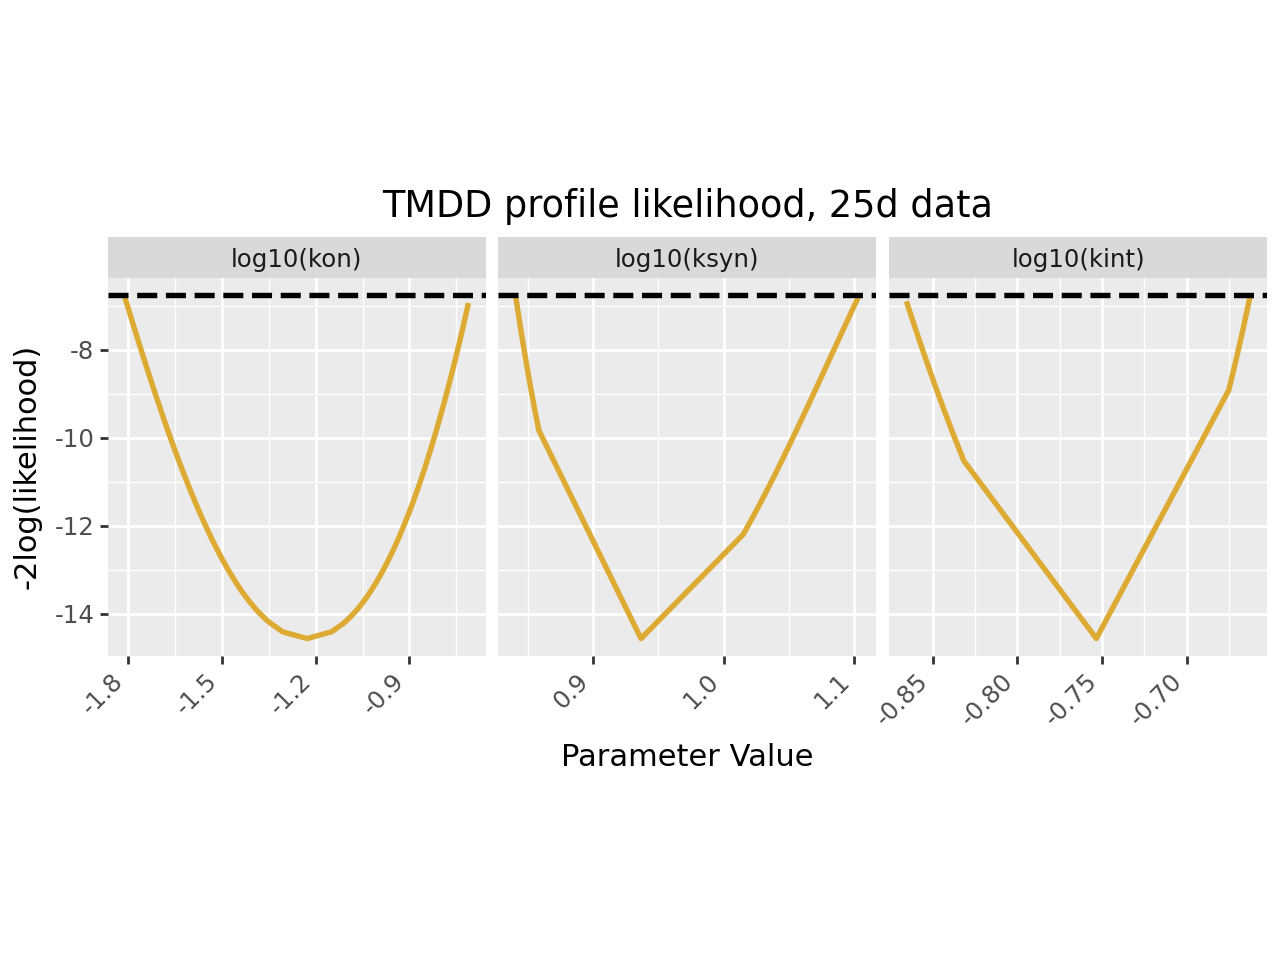

In [15]:
# Note the profile likelihood algorithm always seeks to increase the objective along the profile.  However, due to
# numeric effects (or sometimes genuine local minima separate from the starting point), this may not always happen.  The
# keyword arguments `reversal_reltol` and `reversal_abstol` affect how the algorithm detects objective decreases. If you
# are getting early termination of profiles with the `reversal` flag, try to relax these tolerances.
profiles_25d_1 = opt_result_25d_1.profile_likelihood(reversal_reltol=1e-2)
plot_and_summarize_profiles(profiles_25d_1, "TMDD profile likelihood, 25d data")

With the new data, `ksyn` and `kint` are now identifiable.  Note that better resolution near the minimum can be obtained by adjusting the `precision` and `max_step` options, though this may take longer to compute.

## Fitting more parameters
Now, let's try to fit and calculate the profile likelihood for `k12` in addition to the three parameters fit above.  The parameter `k12`, which controls the rate of transfer to the peripheral compartment, has similar qualitative effects on the timecourse curves as some of the other parameters.

Total: 1, Running: 0, Succeeded: 1, Failed: 0

iteration,objective,kon_fit_0,ksyn_fit_2,kint_fit_5,k12_fit_6
0,1163.547455,0.010000,1.000000,0.010000,0.000200
1,825.312726,0.007742,2.629096,0.010094,0.000201
2,109.382261,0.010004,19.106195,0.010331,0.000202
3,109.382261,0.010004,19.106195,0.010331,0.000202
4,103.206450,0.006304,19.198877,0.012510,0.000199
5,82.093785,0.006451,22.971509,0.019897,0.000191
6,47.197940,0.005989,28.811241,0.052400,0.000177
7,47.197940,0.005989,28.811241,0.052400,0.000177
8,21.459381,0.005561,28.388601,0.085786,0.000171
9,20.126558,0.005581,25.578837,0.230391,0.000152


Total: 1, Running: 0, Succeeded: 1, Failed: 0

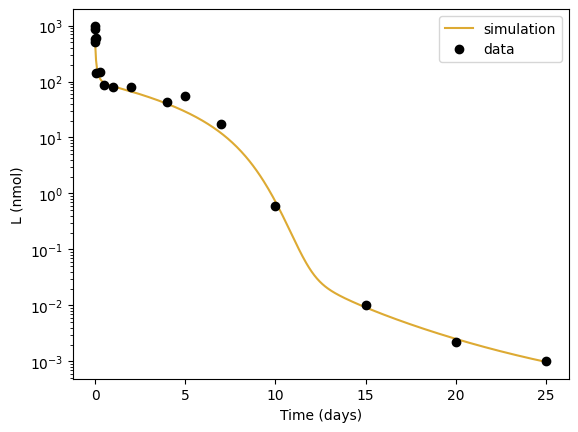

In [16]:
opt_result_25d_2 = abm.optimize(
    measurements="tables/TMDD_data_25d.csv",
    models="model_files/TMDD.model",
    parameters="tables/TMDD_parameters_2.csv",
    opttol=1e-5,
)
sim_25d_fit2_tl = opt_result_25d_2.simulate(
    times=abm.linspace(0, 25, 501, "d"),
    outputs=["L"],
).to_tabeline()

plt.semilogy(sim_25d_fit2_tl[:, "t"], sim_25d_fit2_tl[:, "L"], color=YELLOW, label="simulation")
plt.semilogy(data_25d_tl[:, "time"], data_25d_tl[:, "measurement"], "o", color=BLACK, label="data")
plt.xlabel("Time (days)")
plt.ylabel("L (nmol)")
plt.legend()
plt.show()

,parameter_name,direction,termination,parameter_threshold,objective_threshold
0,kon_fit_0,lower,threshold,0.013343,-5.273091
76,kon_fit_0,upper,threshold,0.228279,-5.273091
118,ksyn_fit_2,lower,threshold,6.579066,-5.273084
129,ksyn_fit_2,upper,threshold,13.465945,-5.273084
226,kint_fit_5,lower,threshold,0.130005,-5.273073
241,kint_fit_5,upper,max_iterations,NaN,NaN
341,k12_fit_6,lower,max_iterations,NaN,NaN
441,k12_fit_6,upper,threshold,0.011763,-5.273076


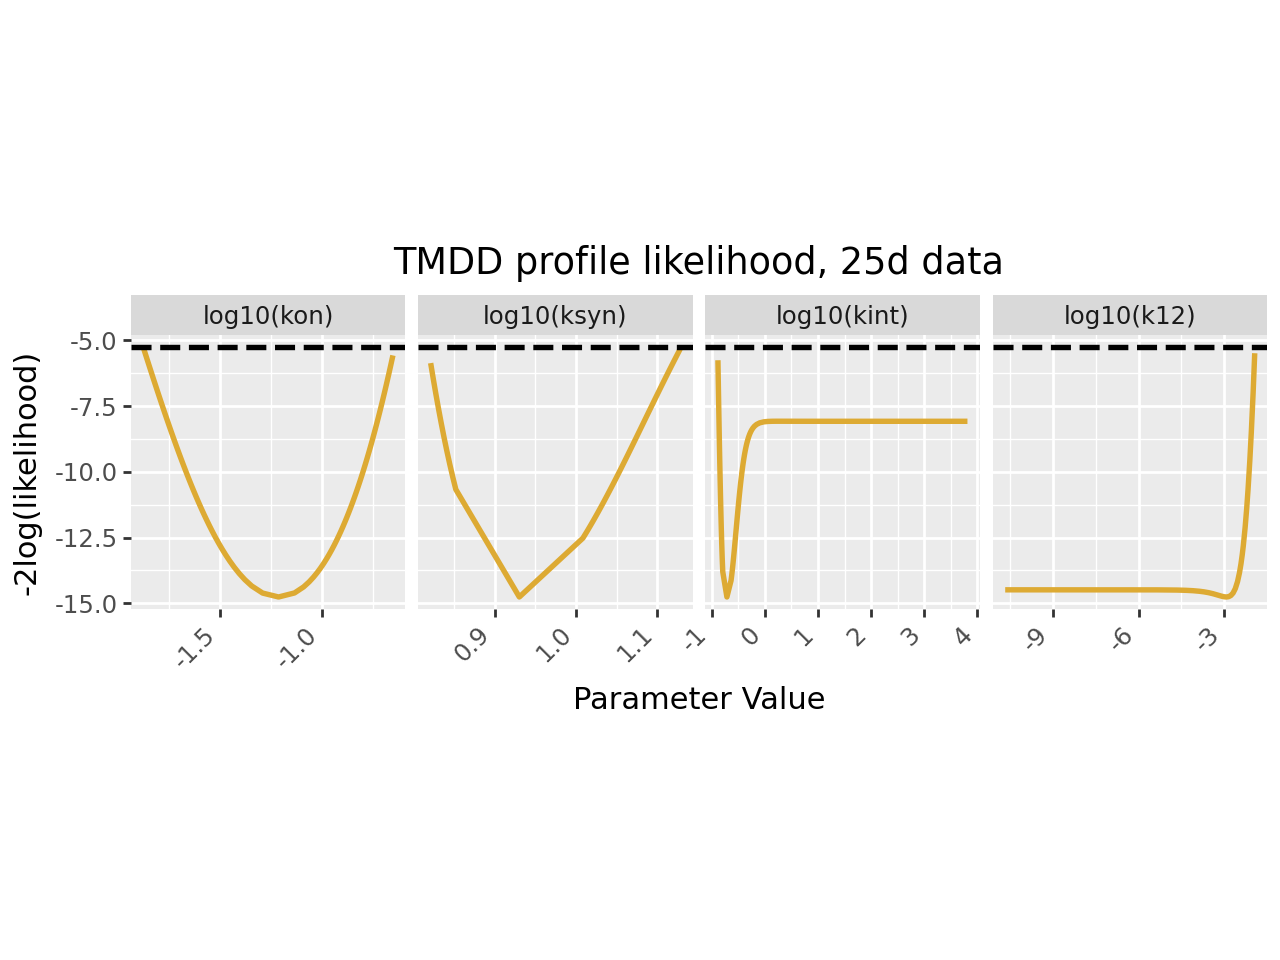

In [17]:
profiles_25d_2 = opt_result_25d_2.profile_likelihood(reversal_reltol=1e-2)
plot_and_summarize_profiles(profiles_25d_2, "TMDD profile likelihood, 25d data")

We see `k12` is not identifiable, and `kint` is in fact no longer identifiable.  More data, perhaps from the peripheral compartment, would be needed.

## Additional note
For completeness, the script `generate_data.py` used to generate the synthetic data, along with the corresponding table of parameter values `TMDD_parameters_orig.csv`, have been included with this example.